In [18]:
import yfinance as yf
import pandas as pd
from datetime import datetime

In [19]:

# List of sectors and their respective ticker symbols
sectors = {
    'Energy': '^AXEJ',
    'Materials': '^AXMJ',
    'Industrials': '^AXNJ',
    'Consumer Discretionary': '^AXDJ',
    'Consumer Staples': '^AXSJ',
    'Health Care': '^AXHJ',
    'Financials': '^AXFJ',
    'Information Technology': '^AXIJ',
    'Communication Services': '^AXTJ',
    'Utilities': '^AXUJ',
    'Real Estate': '^AXPJ'
}

# Define the date range
end_date = "2023-06-30"  # Today's date
start_date = (datetime.strptime(end_date, '%Y-%m-%d') - pd.DateOffset(years=5)).strftime('%Y-%m-%d')  # Date 5 years before the end_date

# Download data for all tickers over the specified date range
data = yf.download(list(sectors.values()), start=start_date, end=end_date)


# Extract the 'Close' data for all tickers
close_data = data['Close']


# Display the closing prices
print(close_data)



[*********************100%%**********************]  11 of 11 completed
                  ^AXDJ         ^AXEJ        ^AXFJ         ^AXHJ        ^AXIJ  \
Date                                                                            
2018-07-02  2440.000000  11941.000000  6197.000000  30366.800781  1129.300049   
2018-07-03  2463.500000  12052.200195  6253.700195  30708.099609  1133.400024   
2018-07-04  2459.800049  12006.900391  6207.500000  30593.099609  1126.900024   
2018-07-05  2459.199951  12048.400391  6269.700195  30726.400391  1122.900024   
2018-07-06  2470.500000  12201.299805  6343.700195  30853.900391  1123.500000   
...                 ...           ...          ...           ...          ...   
2023-06-23  2863.100098  10614.900391  6085.200195  41490.500000  1750.300049   
2023-06-26  2860.399902  10605.000000  6055.000000  41250.398438  1765.699951   
2023-06-27  2861.000000  10627.500000  6094.700195  41200.898438  1759.199951   
2023-06-28  2922.199951  10754.700195 

<Axes: xlabel='Date'>

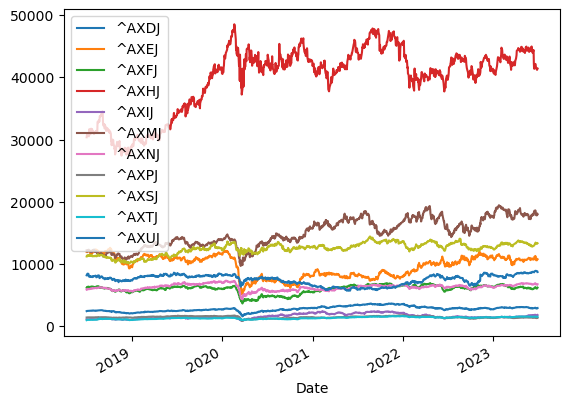

In [20]:
close_data.plot()

In [21]:
## Normalise the data

daily_returns = close_data.pct_change()


In [22]:
daily_returns.head()

,^AXDJ,^AXEJ,^AXFJ,^AXHJ,^AXIJ,^AXMJ,^AXNJ,^AXPJ,^AXSJ,^AXTJ,^AXUJ
Date,,,,,,,,,,,
2018-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-03,0.009631,0.009312,0.009150,0.011239,0.003631,-0.014306,0.011168,0.005156,0.011483,0.021410,0.012834
2018-07-04,-0.001502,-0.003759,-0.007388,-0.003745,-0.005735,-0.001530,-0.006721,-0.001546,-0.005359,0.005365,0.002025
2018-07-05,-0.000244,0.003456,0.010020,0.004357,-0.003550,-0.002281,0.008841,0.002041,0.004271,0.016996,0.015233
2018-07-06,0.004595,0.012690,0.011803,0.004150,0.000534,0.011240,0.004934,0.006602,0.006794,0.013991,0.002939


In [23]:
## Clean data

print(daily_returns.isna().sum())

^AXDJ    1
^AXEJ    1
^AXFJ    1
^AXHJ    1
^AXIJ    1
^AXMJ    1
^AXNJ    1
^AXPJ    1
^AXSJ    1
^AXTJ    1
^AXUJ    1
dtype: int64


In [24]:
## Drop the NA's
daily_returns_dropped = daily_returns.dropna()

<Axes: xlabel='Date'>

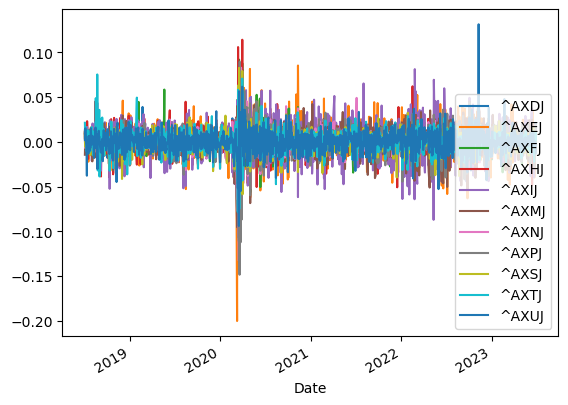

In [25]:
daily_returns_dropped.plot()